In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
import torch
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [18]:
from dataloader import *
from display import *
# from dataloader import load_nosepoint, reag_img_part1

In [19]:
# Use all 6 images of the first 32 persons (index 1-32) as the training set
# (total 32 x 6 = 192 images)
training_set = NoseKeypointDataset(idxs=np.arange(32), root_dir=ROOT_DIR)

In [20]:
# Use images of the remaining 8 persons (index 33-40) as the validation set
# (total 8 * 6 = 48 images)
validation_set = NoseKeypointDataset(idxs=np.arange(32, 40), root_dir=ROOT_DIR)

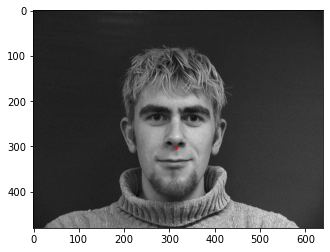

In [21]:
# Plotting a few input images and their nose keypoints.
plt.figure()
show_keypoints(training_set[0])
plt.show()

In [23]:
from cnn import NoseFinder
from torch.nn import MSELoss
import torch.nn.functional as F
from torch.optim import Adam
from torch.utils.data import DataLoader
from tqdm.contrib import tenumerate

# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 16, (60, 80, 1), 3, (1, 2)
loader=DataLoader(training_set,batch_size=N, shuffle=True)

input_data = training_set
model = NoseFinder() #.to(device)
loss_fn = F.mse_loss
learning_rate = 1e-3
optimizer = Adam(model.parameters(), lr=learning_rate)
epochs = 20
for ep in range(epochs):
    for i,(img,keypts) in tenumerate(loader):
        # img,keypts = img.to(device), keypts.to(device)
        # print("input: ", img.shape)
        pred_keypts = model(img)

        # Compute and print loss.
        loss = loss_fn(pred_keypts, keypts)

        print(i, loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

100%|██████████| 12/12 [00:26<00:00,  2.20s/it]


In [ ]:
# clone the trained model to avoid mutations
trained_model = model.clone()

# display sample images and keypoints
num_samples_to_display = 5
chosen = np.randint(len(training_set), size=num_samples)
for i in chosen:

    plt.figure()